# Bondora Data Preprocessing 

In this project we will be doing credit risk modelling of peer to peer lending Bondora systems.Data for the study has been retrieved from a publicly available data set of a leading European P2P lending platform  ([**Bondora**](https://www.bondora.com/en/public-reports#dataset-file-format)).The retrieved data is a pool of both defaulted and non-defaulted loans from the time period between **1st March 2009** and **27th January 2020**. The data
comprises of demographic and financial information of borrowers, and loan transactions.In P2P lending, loans are typically uncollateralized and lenders seek higher returns as a compensation for the financial risk they take. In addition, they need to make decisions under information asymmetry that works in favor of the borrowers. In order to make rational decisions, lenders want to minimize the risk of default of each lending decision, and realize the return that compensates for the risk.

In this notebook we will preprocess the raw dataset and will create new preprocessed csv that can be used for building credit risk models.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Bondora_raw.csv',low_memory=False)

In [3]:
df.shape

(134529, 112)

In [5]:
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,2009-06-11 16:40:39,2009-06-16,2010-07-06,2009-07-27,2010-06-25,2010-06-25,17,5,2.0,1,61,1947-11-26,1.0,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,7,3.0,1.0,0,3.0,UpTo3Years,klienditeenindaja,MoreThan25Years,7.0,NaN,6000.0,0.0,0.0,0.0,0.0,0.0,4500.0,10500.0,0,0.0,0,0.0,0.0,25,True,1800.0000,319.0800,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.0408,20.4222,0.0,0.0,0.00,0.00,1,83.0852,0.0000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,2009-06-10 15:48:57,2009-06-15,2009-07-07,2009-07-15,2009-07-15,2009-07-15,20,4,2.0,1,48,1960-11-05,1.0,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,0,3.0,MoreThan5Years,Õppealajuhataja lasteaias,MoreThan25Years,16.0,NaN,8300.0,0.0,0.0,0.0,0.0,0.0,2500.0,10800.0,0,0.0,0,0.0,0.0,15,True,2200.0000,45.8300,2009-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,140.6057,2.0227,0.0,0.0,0.00,0.00,2,255.6467,258.6256,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,2009-06-05 19:12:29,2009-06-15,NaN,2009-07-27,2011-02-25,2014-05-13,20,6,2.0,1,58,1950-11-13,1.0,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,0,3.0,UpTo4Years,teenindaja,MoreThan25Years,9.0,NaN,5000.0,0.0,0.0,0.0,0.0,0.0,2000.0,7000.0,0,0.0,0,0.0,0.0,25,True,319.5409,197.2926,2012-10-01,2813.0,2012-05-14,2935.0,2012-01-13,NaN,NaN,NaN,NaN,2012-07-16,116.35,236.97,38.24,279.5049,270.7323,163.1549,50.99,NaN,2016-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late,True,180+,180+,NaN,NaN,NaN,NaN,203.1909,59.7626,0.0,0.0,116.35,414.07,0,0.0000,

## Data Understanding

| Feature                                | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|----------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ActiveLateCategory                     | When a loan is in Principal Debt then it will be categorized by Principal Debt days                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| ActiveLateLastPaymentCategory          | Shows how many days has passed since last payment and categorised if it is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| ActiveScheduleFirstPaymentReached      | Whether the first payment date has been reached according to the active schedule                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| Age                                    | The age of the borrower when signing the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Amount                                 | Amount the borrower received on the Primary Market. This is the principal balance of your purchase from Secondary Market                                                                                                                                                                                                                                                                                                                                                                                            |
| AmountOfPreviousLoansBeforeLoan        | Value of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| AppliedAmount                          | The amount borrower applied for originally                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| AuctionBidNumber                       | Unique bid number which is accompanied by Auction number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| AuctionId                              | A unique number given to all auctions                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| AuctionName                            | Name of the Auction, in newer loans it is defined by the purpose of the loan                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| AuctionNumber                          | Unique auction number which is accompanied by Bid number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| BidPrincipal                           | On Primary Market BidPrincipal is the amount you made your bid on. On Secondary Market BidPrincipal is the purchase price                                                                                                                                                                                                                                                                                                                                                                                           |
| BidsApi                                | The amount of investment offers made via Api                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| BidsManual                             | The amount of investment offers made manually                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| BidsPortfolioManager                   | The amount of investment offers made by Portfolio Managers                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| BoughtFromResale_Date                  | The time when the investment was purchased from the Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| City                                   | City of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ContractEndDate                        | The date when the loan contract ended                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| Country                                | Residency of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| County                                 | County of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| CreditScoreEeMini                      | 1000 No previous payments problems 900 Payments problems finished 24-36 months ago 800 Payments problems finished 12-24 months ago 700 Payments problems finished 6-12 months ago 600 Payment problems finished < 6 months ago 500 Active payment problems                                                                                                                                                                                                                                                          |
| CreditScoreEsEquifaxRisk               | Generic score for the loan applicants that do not have active past due operations in ASNEF; a measure of the probability of default one year ahead; the score is given on a 6-grade scale: AAA (“Very low”), AA (“Low”), A (“Average”), B (“Average High”), C (“High”), D (“Very High”).                                                                                                                                                                                                                            |
| CreditScoreEsMicroL                    | A score that is specifically designed for risk classifying subprime borrowers (defined by Equifax as borrowers that do not have access to bank loans); a measure of the probability of default one month ahead; the score is given on a 10-grade scale, from the best score to the worst: M1, M2, M3, M4, M5, M6, M7, M8, M9, M10.                                                                                                                                                                                  |
| CreditScoreFiAsiakasTietoRiskGrade     | Credit Scoring model for Finnish Asiakastieto RL1 Very low risk 01-20 RL2 Low risk 21-40 RL3 Average risk 41-60 RL4 Big risk 61-80 RL5 Huge risk 81-100                                                                                                                                                                                                                                                                                                                                                             |
| CurrentDebtDaysPrimary                 | How long the loan has been in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| CurrentDebtDaysSecondary               | How long the loan has been in Interest Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| DateOfBirth                            | The date of the borrower's birth                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| DebtOccuredOn                          | The date when Principal Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| DebtOccuredOnForSecondary              | The date when Interest Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| DebtToIncome                           | Ratio of borrower's monthly gross income that goes toward paying loans                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| DefaultDate                            | The date when loan went into defaulted state and collection process was started                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| DesiredDiscountRate                    | Investment being sold at a discount or premium                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| EAD1                                   | Exposure at default, outstanding principal at default                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| EAD2                                   | Exposure at default, loan amount less all payments prior to default                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Education                              | 1 Primary education 2 Basic education 3 Vocational education 4 Secondary education 5 Higher education                                                                                                                                                                                                                                                                                                                                                                                                               |
| EL_V0                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V1                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V2                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EmploymentDurationCurrentEmployer      | Employment time with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| EmploymentPosition                     | Employment position with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| EmploymentStatus                       | 1 Unemployed 2 Partially employed 3 Fully employed 4 Self-employed 5 Entrepreneur 6 Retiree                                                                                                                                                                                                                                                                                                                                                                                                                         |
| ExistingLiabilities                    | Borrower's number of existing liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ExpectedLoss                           | Expected Loss calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ExpectedReturn                         | Expected Return calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| FirstPaymentDate                       | First payment date according to initial loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| FreeCash                               | Discretionary income after monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| Gender                                 | 0 Male 1 Woman 2 Undefined                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| GracePeriodEnd                         | Date of the end of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| GracePeriodStart                       | Date of the beginning of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| HomeOwnershipType                      | 0 Homeless 1 Owner 2 Living with parents 3 Tenant, pre-furnished property 4 Tenant, unfurnished property 5 Council house 6 Joint tenant 7 Joint ownership 8 Mortgage 9 Owner with encumbrance 10 Other                                                                                                                                                                                                                                                                                                              |
| IncomeFromChildSupport                 | Borrower's income from alimony payments                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| IncomeFromFamilyAllowance              | Borrower's income from child support                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeFromLeavePay                     | Borrower's income from paternity leave                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| IncomeFromPension                      | Borrower's income from pension                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| IncomeFromPrincipalEmployer            | Borrower's income from its employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| IncomeFromSocialWelfare                | Borrower's income from social support                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| IncomeOther                            | Borrower's income from other sources                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeTotal                            | Borrower's total income                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Interest                               | Maximum interest rate accepted in the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyBalance              | Unpaid interest and penalties                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| InterestAndPenaltyDebtServicingCost    | Service cost related to the recovery of the debt based on the interest and penalties of the investment                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyPaymentsMade         | Note owner received loan transfers earned interest, penalties total amount                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| InterestAndPenaltyWriteOffs            | Interest that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| InterestLateAmount                     | Interest debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| InterestRecovery                       | Interest recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LanguageCode                           | 1 Estonian 2 English 3 Russian 4 Finnish 5 German 6 Spanish 9 Slovakian                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| LastPaymentOn                          | The date of the current last payment received from the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LiabilitiesTotal                       | Total monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ListedOnUTC                            | Date when the loan application appeared on Primary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| LoanDate                               | Date when the loan was issued                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| LoanDuration                           | Current loan duration in months                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LoanId                                 | A unique ID given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| LoanNumber                             | A unique number given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| LoanStatusActiveFrom                   | How long the current status has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| LossGivenDefault                       | Gives the percentage of outstanding exposure at the time of default that an investor is likely to lose if a loan actually defaults. This means the proportion of funds lost for the investor after all expected recovery and accounting for the time value of the money recovered. In general, LGD parameter is intended to be estimated based on the historical recoveries. However, in new markets where limited experience does not allow us more precise loss given default estimates, a LGD of 90% is assumed. |
| MaritalStatus                          | 1 Married 2 Cohabitant 3 Single 4 Divorced 5 Widow                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| MaturityDate_Last                      | Loan maturity date according to the current payment schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| MaturityDate_Original                  | Loan maturity date according to the original loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| ModelVersion                           | The version of the Rating model used for issuing the Bondora Rating                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| MonthlyPayment                         | Estimated amount the borrower has to pay every month                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| MonthlyPaymentDay                      | The day of the month the loan payments are scheduled for The actual date is adjusted for weekends and bank holidays (e.g. if 10th is Sunday then the payment will be made on the 11th in that month)                                                                                                                                                                                                                                                                                                                |
| NewCreditCustomer                      | Did the customer have prior credit history in Bondora 0 Customer had at least 3 months of credit history in Bondora 1 No prior credit history in Bondora                                                                                                                                                                                                                                                                                                                                                            |
| NextPaymentDate                        | According to schedule the next date for borrower to make their payment                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NextPaymentNr                          | According to schedule the number of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NextPaymentSum                         | According to schedule the amount of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoOfPreviousLoansBeforeLoan            | Number of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| note_id                                | A unique ID given to the investments                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoteLoanLateChargesPaid                | The amount of late charges the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| NoteLoanTransfersInterestAmount        | The amount of interest the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| NoteLoanTransfersMainAmount            | The amount of principal the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| NrOfDependants                         | Number of children or other dependants                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NrOfScheduledPayments                  | According to schedule the count of scheduled payments                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| OccupationArea                         | 1 Other 2 Mining 3 Processing 4 Energy 5 Utilities 6 Construction 7 Retail and wholesale 8 Transport and warehousing 9 Hospitality and catering 10 Info and telecom 11 Finance and insurance 12 Real-estate 13 Research 14 Administrative 15 Civil service & military 16 Education 17 Healthcare and social help 18 Art and entertainment 19 Agriculture, forestry and fishing                                                                                                                                      |
| OnSaleSince                            | Time when the investment was added to Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| PenaltyLateAmount                      | Late charges debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PlannedInterestPostDefault             | The amount of interest that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| PlannedInterestTillDate                | According to active schedule the amount of interest the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PlannedPrincipalPostDefault            | The amount of principal that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| PlannedPrincipalTillDate               | According to active schedule the amount of principal the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PreviousEarlyRepaymentsBeforeLoan      | How much was the early repayment amount before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PreviousEarlyRepaymentsCountBeforeLoan | How many times the borrower had repaid early                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PreviousRepaymentsBeforeLoan           | How much the borrower had repaid before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalBalance                       | Principal that still needs to be paid by the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalDebtServicingCost             | Service cost related to the recovery of the debt based on the principal of the investment                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PrincipalLateAmount                    | Principal debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalOverdueBySchedule             | According to the current schedule, principal that is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PrincipalPaymentsMade                  | Note owner received loan transfers principal amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| PrincipalRecovery                      | Principal recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalWriteOffs                     | Principal that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ProbabilityOfDefault                   | Probability of Default, refers to a loan’s probability of default within one year horizon.                                                                                                                                                                                                                                                                                                                                                                                                                          |
| PurchasePrice                          | Investment amount or secondary market purchase price                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Rating                                 | Bondora Rating issued by the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Rating_V0                              | Bondora Rating issued by version 0 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V1                              | Bondora Rating issued by version 1 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V2                              | Bondora Rating issued by version 2 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| RecoveryStage                          | Current stage according to the recovery model 1 Collection 2 Recovery 3 Write Off                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| RefinanceLiabilities                   | The total amount of liabilities after refinancing                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| ReScheduledOn                          | The date when the a new schedule was assigned to the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| Restructured                           | The original maturity date of the loan has been increased by more than 60 days                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| SoldInResale_Date                      | The date when the investment was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| SoldInResale_Price                     | The price of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| SoldInResale_Principal                 | The principal remaining of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| StageActiveSince                       | How long the current recovery stage has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Status                                 | The current status of the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| UseOfLoan                              | 0 Loan consolidation 1 Real estate 2 Home improvement 3 Business 4 Education 5 Travel 6 Vehicle 7 Other 8 Health 101 Working capital financing 102 Purchase of machinery equipment 103 Renovation of real estate 104 Accounts receivable financing 105 Acquisition of means of transport 106 Construction finance 107 Acquisition of stocks 108 Acquisition of real estate 109 Guaranteeing obligation 110 Other business All codes in format 1XX are for business loans that are not supported since October 2012  |
| UserName                               | The user name generated by the system for the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| VerificationType                       | Method used for loan application data verification 0 Not set 1 Income unverified 2 Income unverified, cross-referenced by phone 3 Income verified 4 Income and expenses verified                                                                                                                                                                                                                                                                                                                                    |
| WorkExperience                         | Borrower's overall work experience in years                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| WorseLateCategory                      | Displays the last longest period of days when the loan was in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| XIRR                                   | XIRR (extended internal rate of return) is a methodology to calculate the net return using the loan issued date and amount, loan repayment dates and amounts and the principal balance according to the original repayment date. All overdue principal payments are written off immediately. No provisions for future losses are made & only received (not accrued or scheduled) interest payments are taken into account.                                                                                          |

In [4]:
df['Status'].value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

# Percentage of Missing Values

In [6]:
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)
persent_of_nulls=round(df.isnull().sum()/len(df.index), 2)*100

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [8]:
persent_of_nulls=persent_of_nulls.sort_values(ascending=False)

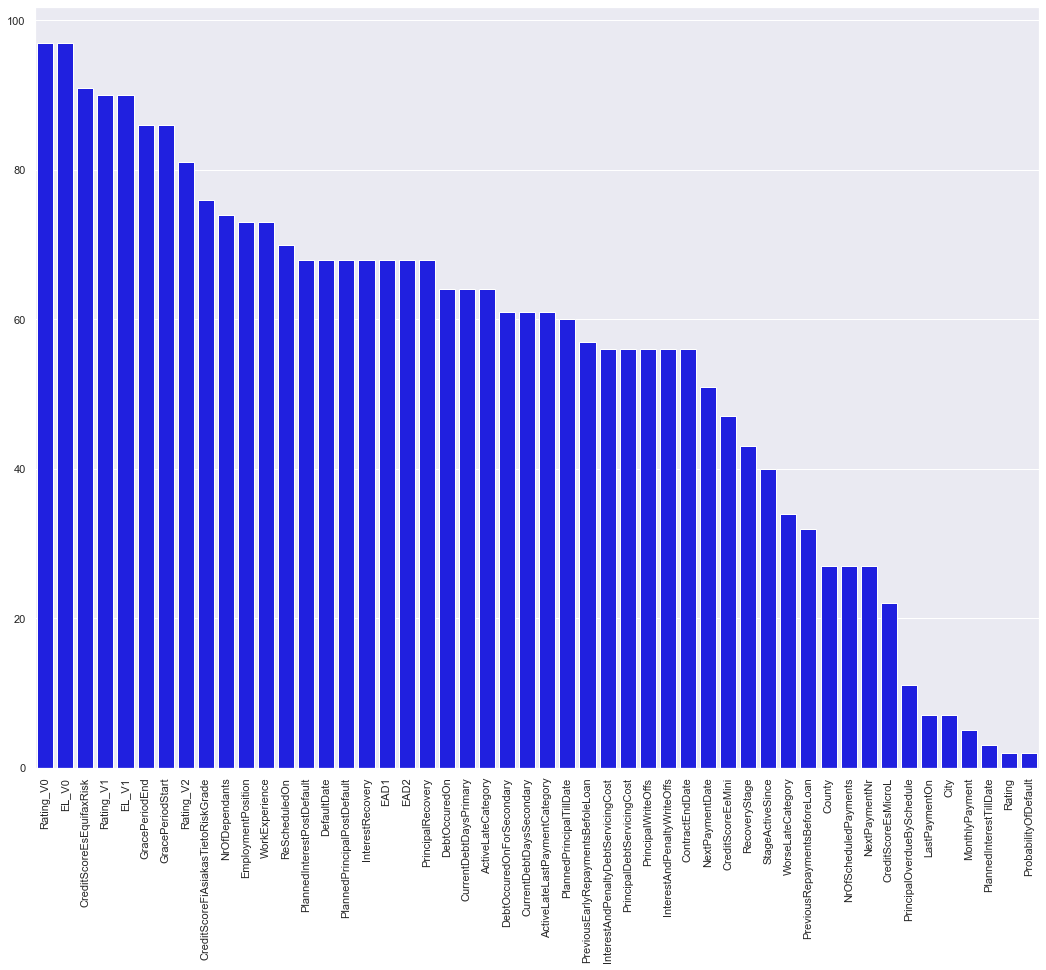

In [9]:
sns.set(rc={'figure.figsize':(18,14)})
sns.barplot(x=persent_of_nulls.index[:50],y=persent_of_nulls.values[:50],color='blue')
plt.xticks(rotation=90);

Removing all the features which have more than 40% missing values

In [10]:
# removing the columns having more than 40% missing values
missing_columns = df.columns[100*(df.isnull().sum()/len(df.index)) > 40]
print(missing_columns)

Index(['ContractEndDate', 'NrOfDependants', 'EmploymentPosition',
       'WorkExperience', 'PlannedPrincipalTillDate', 'CurrentDebtDaysPrimary',
       'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary', 'DefaultDate',
       'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1',
       'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'RecoveryStage',
       'EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2',
       'ActiveLateCategory', 'CreditScoreEsEquifaxRisk',
       'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini',
       'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs',
       'PreviousEarlyRepaymentsBefoleLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'ReScheduledOn',
       'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost',
       'ActiveLateLastPaymentCategory'],
      dtype='object')


In [11]:
miss_col=['ContractEndDate', 'NrOfDependants', 'EmploymentPosition',
       'WorkExperience', 'PlannedPrincipalTillDate', 'CurrentDebtDaysPrimary',
       'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary',
       'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1',
       'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'RecoveryStage',
       'EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2',
       'ActiveLateCategory', 'CreditScoreEsEquifaxRisk',
       'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini',
       'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs',
       'PreviousEarlyRepaymentsBefoleLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'ReScheduledOn',
       'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost',
       'ActiveLateLastPaymentCategory']

In [12]:
loan = df.drop(miss_col, axis=1)
print(loan.shape)


(134529, 77)


In [13]:
loan['NrOfScheduledPayments'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: NrOfScheduledPayments, dtype: float64

Apart from missing value features there are some features which will have no role in default prediction like 'ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth' (**because age is already present**), 'BiddingStartedOn','UserName','NextPaymentNr','NrOfScheduledPayments','IncomeFromPrincipalEmployer', 'IncomeFromPension',
'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare','IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther' (**As Total income is already present which is total of all these income**), 'LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'LastPaymentOn', 'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory'

In [14]:
cols_del = ['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth',
       'BiddingStartedOn','UserName','NextPaymentNr',
       'NrOfScheduledPayments','IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther','LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory']

In [15]:
loan = loan.drop(cols_del,axis=1)

In [16]:
loan.shape

(134529, 48)

## Creating Target Variable

Here, status is the variable which help us in creating target variable. The reason for not making status as target variable is that it has three unique values **current, Late and repaid**. There is no default feature but there is a feature **default date** which tells us when the borrower has defaulted means on which date the borrower defaulted. So, we will be combining **Status** and **Default date** features for creating target  variable.The reason we cannot simply treat Late as default because it also has some records in which actual status is Late but the user has never defaulted i.e., default date is null.
So we will first filter out all the current status records because they are not matured yet they are current loans. 

In [17]:
loan['Status'].value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

In [18]:
# filtering out Current Status records

loan = loan[loan['Status'] != 'Current']

Now, we will create new target variable in which 0 will be assigned 

---

when default date is null means borrower has never defaulted while 1 in case default date is present.

In [19]:
loan["Default"] = loan['Status'].apply(lambda x: 0 if x=='Repaid' else 1)

In [20]:
loan['Default'].value_counts()

1    45772
0    31622
Name: Default, dtype: int64

In [21]:
loan = loan.drop(['Status'],axis=1)

In [22]:
loan.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,LastPaymentOn,DefaultDate,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Default
0,0,0,115.0410,True,2009-06-16,2009-07-27,2010-06-25,2010-06-25,2.0,1,61,1.0,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,7,3.0,1.0,3.0,UpTo3Years,7.0,NaN,10500.0,0,0.0,0,0.0,0.0,25,2010-07-06,NaN,NaN,False,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,0
1,0,0,140.6057,False,2009-06-15,2009-07-15,2009-07-15,2009-07-15,2.0,1,48,1.0,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,3.0,MoreThan5Years,16.0,NaN,10800.0,0,0.0,0,0.0,0.0,15,2009-07-07,NaN,NaN,False,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,0
2,0,0,319.5580,True,2009-06-15,2009-07-27,2011-02-25,2014-05-13,2.0,1,58,1.0,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,3.0,UpTo4Years,9.0,NaN,7000.0,0,0.0,0,0.0,0.0,25,2012-10-01,2012-07-16,NaN,True,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,1
3,0,0,57.5205,True,2009-06-15,2009-07-15,2010-09-15,2010-09-15,2.0,1,23,1.0,EE,127.8233,57.5205,45.0,15,NaN,HARJU,PALDISKI,0,2.0,3.0,NaN,UpTo2Years,1.0,NaN,11600.0,0,0.0,0,0.0,0.0,15,2010-09-15,NaN,NaN,False,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,0
4,0,0,319.5582,True,2009-06-14,2009-07-27,2010-06-25,2010-06-25,2.0,1,25,1.0,EE,319.5582,319.5436,30.0,12,NaN,TARTU,TARTU,6,4.0,2.0,3.0,UpTo2Years,7.0,NaN,6800.0,0,0.0,0,0.0,0.0,25,2015-07-16,2009-09-28,NaN,False,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,0


Now, we will remove Loan Status and default date as we have already created target variable with the help of these two features

In [23]:
loan = loan.drop(['DefaultDate'],axis=1)

## checking datatype of all features
In this step we will see any data type mismatch

In [25]:
loan.dtypes

BidsPortfolioManager                        int64
BidsApi                                     int64
BidsManual                                float64
NewCreditCustomer                            bool
LoanDate                                   object
FirstPaymentDate                           object
MaturityDate_Original                      object
MaturityDate_Last                          object
VerificationType                          float64
LanguageCode                                int64
Age                                         int64
Gender                                    float64
Country                                    object
AppliedAmount                             float64
Amount                                    float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
County                                     object
City                                       object


Checking distribution of categorical variables

In [26]:
loan.describe(include=[np.object])

,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,Country,County,City,EmploymentDurationCurrentEmployer,LastPaymentOn,Rating,CreditScoreEsMicroL
count,77394,77394,77394,77394,77394,56879,72350,76520,71782,74666,51208
unique,3490,2123,3085,3294,4,960,6625,9,2888,8,11
top,2019-07-09,2019-08-05,2024-06-03,2024-06-03,EE,Harju maakond,Tallinn,MoreThan5Years,2020-01-20,F,M
freq,158,718,381,329,39896,8955,6467,29328,1066,15657,39217


checking distribution of all numeric columns

In [27]:
loan.describe()

,BidsPortfolioManager,BidsApi,BidsManual,VerificationType,LanguageCode,Age,Gender,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Default
count,77394.000000,77394.000000,77394.000000,77349.000000,77394.000000,77394.000000,77349.000000,77394.000000,77394.000000,77394.00000,77394.000000,70767.000000,77394.000000,77349.000000,77349.000000,77197.000000,77308.000000,75742.000000,7.739400e+04,77394.000000,7.739400e+04,77394.000000,77349.000000,77349.000000,77394.000000,77394.000000,77394.000000,77394.000000,77394.000000,77394.000000,77394.000000,58078.000000,77394.000000,77394.000000
mean,1221.504303,32.766506,563.032056,2.849061,3.056529,39.611611,0.418583,2746.981169,2472.673771,40.30165,44.425498,130.393314,1.130979,3.704961,0.410878,0.819553,2.753247,3.370046,1.868975e+03,3.350815,7.149255e+02,0.300127,12.011918,195.241403,11.356539,1077.613937,502.770026,1372.262893,1215.017495,1.140799,2172.676382,861.138387,0.077474,0.591415
std,1531.208800,163.557245,821.757218,1.364773,2.016316,12.188868,0.625625,2463.487043,2163.710046,30.61795,16.412387,131.480383,4.049870,1.138152,1.762825,2.171963,5.678410,2.717713,6.193487e+03,3.494328,4.459142e+04,1.123265,18.829522,848.684590,7.336154,1648.865768,829.168708,1944.295361,3220.010093,2.028045,3889.556046,2076.791326,0.384662,0.491575
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,31.955800,6.390000,3.00000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-2332.000000,0.000000,0.000000,0.000000,-34.200000,-2.660000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,246.000000,0.000000,19.000000,1.000000,1.000000,30.000000,0.000000,740.000000,740.000000,23.42000,36.000000,37.975000,-1.000000,3.000000,-1.000000,-1.000000,-1.000000,1.000000,8.900000e+02,1.000000,1.130400e+02,0.000000,0.000000,0.000000,5.000000,61.690000,37.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,613.000000,0.000000,283.000000,4.000000,3.000000,38.000000,0.000000,2125.000000,2020.000000,31.95500,48.000000,101.130000,-1.000000,4.000000,-1.000000,-1.000000,-1.000000,3.000000,1.300000e+03,2.000000,3.830000e+02,0.000000,0.000000,0.000000,10.000000,462.810000,191.165000,516.865000,84.805000,0.000000,0.000000,40.815000,0.000000,1.000000
75%,1629.000000,5.000000,745.000000,4.000000,4.000000,48.000000,1.000000,3720.000000,3185.000000,50.33000,60.000000,175.475000,2.000000,5.000000,2.000000,3.000000,6.000000,4.000000,2.000000e+03,5.000000,7.360000e+02,0.000000,20.810000,269.390000,16.000000,1451.292500,612.415000,2111.980000,1083.985000,1.000000,3000.000000,653.740000,0.000000,1.000000
max,10625.000000,7570.000000,10630.000000,4.000000,22.000000,77.000000,2.000000,10632.000000,10632.000000,264.31000,60.000000,2368.540000,110.000000,5.000000,5.000000,6.000000,19.000000,10.000000,1.012019e+06,36.000000,1.240000e+07,23.000000,198.020000,158748.640000,28.000000,10632.000000,14507.240000,10632.000000,64494.770000,24.000000,51104.000000,34077.420000,11.000000,1.000000


- First we will delete all the features related to date as it is not a time series analysis so these features will not help in predicting target variable.
- As we can see in numeric column distribution there are many columns which are present as numeric but they are actually categorical as per data description such as Verification Type, Language Code, Gender, Use of Loan, Education, Marital Status,EmployementStatus, OccupationArea etc.
- So we will convert these features to categorical features

In [28]:
loan['Gender'][loan['Gender'] == 0.0] = 'Male'
loan['Gender'][loan['Gender'] == 1.0] = 'Female'
loan['Gender'][loan['Gender'] == 2.0] = 'Unknown'

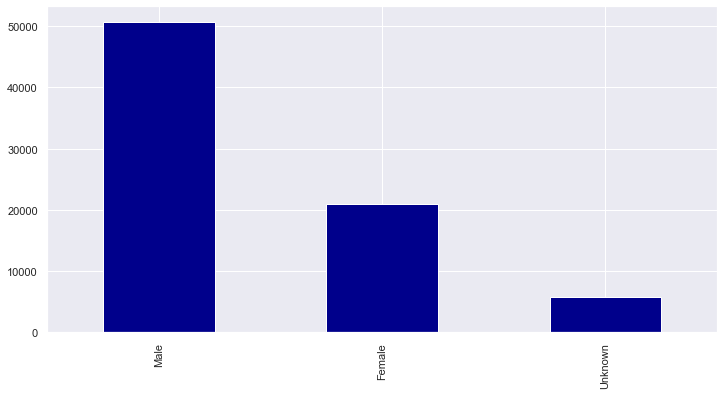

In [29]:
loan['Gender'].value_counts().plot.bar(figsize=(12,6),color='darkblue');

As we can see from above in language code w ehave only descriptions for values 1,2,3,4,5,6, and 9 but it has other values too like 21,22,15,13,10 and 7 but they are very less it may happen they are local language codes whose decription is not present so we will be treated all these values as others

In [30]:
loan['LanguageCode'][loan['LanguageCode'] == 1] = 'Estonian'
loan['LanguageCode'][loan['LanguageCode'] == 2] = 'English'
loan['LanguageCode'][loan['LanguageCode'] == 3] = 'Russian'
loan['LanguageCode'][loan['LanguageCode'] == 4] = 'Finnish'
loan['LanguageCode'][loan['LanguageCode'] == 5] = 'German'
loan['LanguageCode'][loan['LanguageCode'] == 6] = 'Spanish'
loan['LanguageCode'][loan['LanguageCode'] == 9] = 'Slovakian'
loan['LanguageCode'][loan['LanguageCode'] == 7] = 'Others'
loan['LanguageCode'][loan['LanguageCode'] == 10] = 'Others'
loan['LanguageCode'][loan['LanguageCode'] == 13] = 'Others'
loan['LanguageCode'][loan['LanguageCode'] == 15] = 'Others'
loan['LanguageCode'][loan['LanguageCode'] == 21] = 'Others'
loan['LanguageCode'][loan['LanguageCode'] == 22] = 'Others'

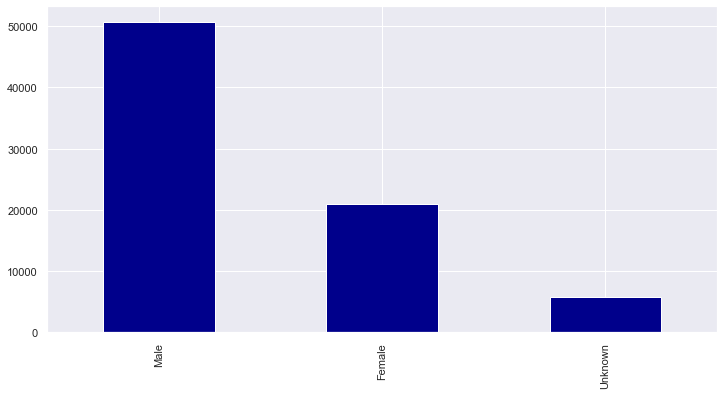

In [31]:
loan['Gender'].value_counts().plot.bar(figsize=(12,6),color='darkblue');

As we can see from above stats most of the loans are -1 category whose description is not avaialble in Bondoro website so we have dig deeper to find that in Bondora most of the loans happened for which purpose so we find in Bondora [Statistics Page](https://www.bondora.com/en/public-statistics) most of the loans around 34.81% are for Not set purpose. so we will encode -1 as Not set category

In [32]:
loan['UseOfLoan'][loan['UseOfLoan'] == -1] = 'Not_set'
loan['UseOfLoan'][loan['UseOfLoan'] == 0] = 'Loan_consolidation'
loan['UseOfLoan'][loan['UseOfLoan'] == 1] = 'Real_estate'
loan['UseOfLoan'][loan['UseOfLoan'] == 2] = 'Home_improvement'
loan['UseOfLoan'][loan['UseOfLoan'] == 3] = 'Business'
loan['UseOfLoan'][loan['UseOfLoan'] == 4] = 'Education'
loan['UseOfLoan'][loan['UseOfLoan'] == 5] = 'Travel'
loan['UseOfLoan'][loan['UseOfLoan'] == 6] = 'Vehicle'
loan['UseOfLoan'][loan['UseOfLoan'] == 7] = 'Other'
loan['UseOfLoan'][loan['UseOfLoan'] == 8] = 'Health'
loan['UseOfLoan'][loan['UseOfLoan'] == 101] = 'Working_capital_financing'
loan['UseOfLoan'][loan['UseOfLoan'] == 102] = 'Purchase_of_machinery_equipment'
loan['UseOfLoan'][loan['UseOfLoan'] == 104] = 'Accounts_receivable_financing'
loan['UseOfLoan'][loan['UseOfLoan'] == 106] = 'Construction_finance'
loan['UseOfLoan'][loan['UseOfLoan'] == 107] = 'Acquisition_of_stocks'
loan['UseOfLoan'][loan['UseOfLoan'] == 108] = 'Acquisition_of_real_estate'
loan['UseOfLoan'][loan['UseOfLoan'] == 110] = 'Other_business'

loan['UseOfLoan'].value_counts()


Not_set                            44177
Other                               8926
Home_improvement                    8102
Loan_consolidation                  6419
Vehicle                             2884
Business                            1743
Travel                              1621
Health                              1367
Education                           1259
Real_estate                          843
Purchase_of_machinery_equipment       21
Other_business                        17
Accounts_receivable_financing          6
Working_capital_financing              5
Acquisition_of_stocks                  2
Acquisition_of_real_estate             1
Construction_finance                   1
Name: UseOfLoan, dtype: int64

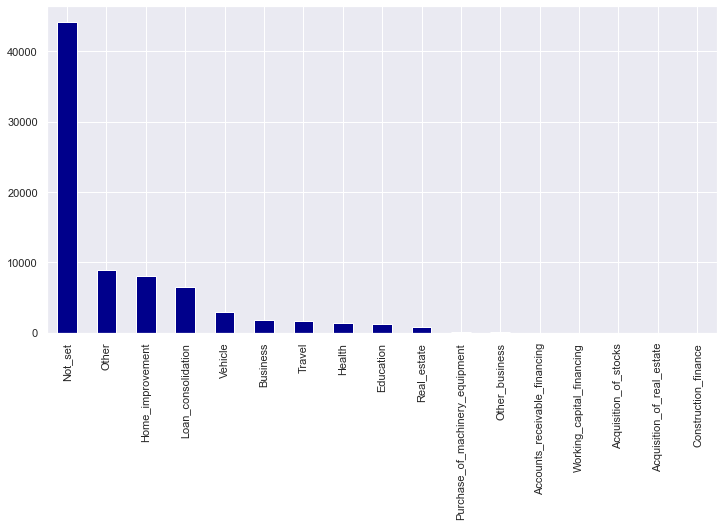

In [33]:
loan['UseOfLoan'].value_counts().plot.bar(figsize=(12,6),color='darkblue');

Again as we can see from above description for -1 and 0 in case of education is not present so we will encode them as Not_present as we dont know anything about them.

In [34]:
loan['Education'][loan['Education'] == 1.0] = 'Primary'
loan['Education'][loan['Education'] == 2.0] = 'Basic'
loan['Education'][loan['Education'] == 3.0] = 'Vocational'
loan['Education'][loan['Education'] == 4.0] = 'Secondary'
loan['Education'][loan['Education'] == 5.0] = 'Higher'
loan['Education'][loan['Education'] == -1.0] = 'Not_present'
loan['Education'][loan['Education'] == 0.0] = 'Not_present'
loan['Education'].value_counts()

Secondary      28557
Higher         20919
Vocational     17257
Basic           5379
Primary         5226
Not_present       11
Name: Education, dtype: int64

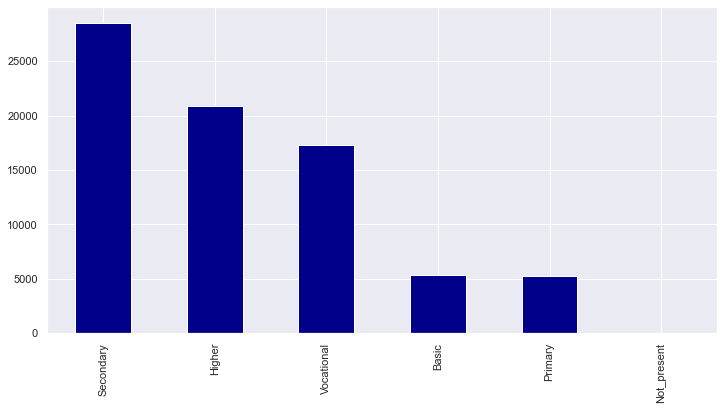

In [35]:
loan['Education'].value_counts().plot.bar(figsize=(12,6),color='darkblue');

Again Marital status of value 0 and -1 has no description so we will encode them as Not_specified

In [36]:
loan['MaritalStatus'][loan['MaritalStatus'] == 1.0] = 'Married'
loan['MaritalStatus'][loan['MaritalStatus'] == 2.0] = 'Cohabitant'
loan['MaritalStatus'][loan['MaritalStatus'] == 3.0] = 'Single'
loan['MaritalStatus'][loan['MaritalStatus'] == 4.0] = 'Divorced'
loan['MaritalStatus'][loan['MaritalStatus'] == 5.0] = 'Widow'
loan['MaritalStatus'][loan['MaritalStatus'] == -1.0] = 'Not_specified'
loan['MaritalStatus'][loan['MaritalStatus'] == 0.0] = 'Not_specified'
loan['MaritalStatus'].value_counts()

Not_specified    44185
Single           11504
Married           9585
Cohabitant        8479
Divorced          3077
Widow              519
Name: MaritalStatus, dtype: int64

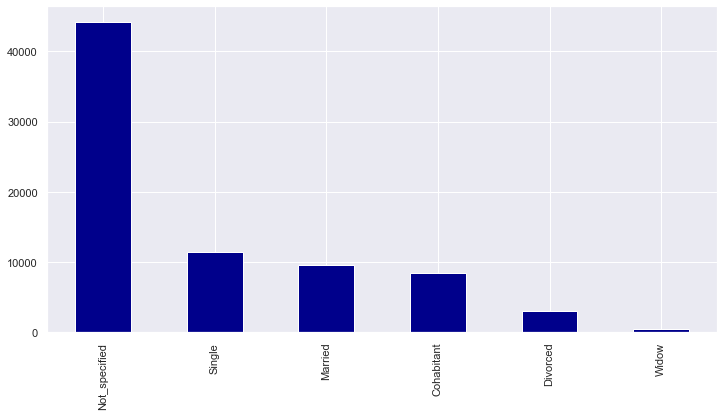

In [37]:
loan['MaritalStatus'].value_counts().plot.bar(figsize=(12,6),color='darkblue');

In [38]:
loan['EmploymentStatus'].value_counts()

-1.0    44177
 3.0    27309
 5.0     1695
 6.0     1663
 4.0     1211
 2.0     1110
 0.0       32
Name: EmploymentStatus, dtype: int64

In [39]:
loan['NewCreditCustomer'].value_counts()

True     48867
False    28527
Name: NewCreditCustomer, dtype: int64

In [40]:
loan['Restructured'].value_counts()

False    61885
True     15509
Name: Restructured, dtype: int64

In [41]:
loan['OccupationArea'].value_counts()

-1.0     44228
 1.0      7640
 7.0      3207
 6.0      3007
 3.0      2876
 8.0      2276
 17.0     2186
 9.0      2106
 10.0     1782
 15.0     1555
 16.0     1251
 11.0     1054
 19.0      893
 14.0      798
 4.0       530
 18.0      524
 13.0      493
 12.0      433
 5.0       342
 2.0       116
 0.0        11
Name: OccupationArea, dtype: int64

In [42]:
loan['EmploymentStatus'][loan['EmploymentStatus'] == 1.0] = 'Unemployed'
loan['EmploymentStatus'][loan['EmploymentStatus'] == 2.0] = 'Partially'
loan['EmploymentStatus'][loan['EmploymentStatus'] == 3.0] = 'Fully'
loan['EmploymentStatus'][loan['EmploymentStatus'] == 4.0] = 'Self_employed'
loan['EmploymentStatus'][loan['EmploymentStatus'] == 5.0] = 'Entrepreneur'
loan['EmploymentStatus'][loan['EmploymentStatus'] == 6.0] = 'Retiree'
loan['EmploymentStatus'][loan['EmploymentStatus'] == -1.0] = 'Not_specified'
loan['EmploymentStatus'][loan['EmploymentStatus'] == 0.0] = 'Not_specified'

loan['NewCreditCustomer'][loan['NewCreditCustomer'] == False] = 'Existing_credit_customer'
loan['NewCreditCustomer'][loan['NewCreditCustomer'] == True] = 'New_credit_Customer'

loan['Restructured'][loan['Restructured'] == False]='No'
loan['Restructured'][loan['Restructured'] == True]='Yes'

loan['OccupationArea'][loan['OccupationArea'] == 1] = 'Other'
loan['OccupationArea'][loan['OccupationArea'] == 2] = 'Mining'
loan['OccupationArea'][loan['OccupationArea'] == 3] = 'Processing'
loan['OccupationArea'][loan['OccupationArea'] == 4] = 'Energy'
loan['OccupationArea'][loan['OccupationArea'] == 5] = 'Utilities'
loan['OccupationArea'][loan['OccupationArea'] == 6] = 'Construction'
loan['OccupationArea'][loan['OccupationArea'] == 7] = 'Retail_and_wholesale'
loan['OccupationArea'][loan['OccupationArea'] == 8] = 'Transport_and_warehousing'
loan['OccupationArea'][loan['OccupationArea'] == 9] = 'Hospitality_and_catering'
loan['OccupationArea'][loan['OccupationArea'] == 10] = 'Info_and_telecom'
loan['OccupationArea'][loan['OccupationArea'] == 11] = 'Finance_and_insurance'
loan['OccupationArea'][loan['OccupationArea'] == 12] = 'Real_estate'
loan['OccupationArea'][loan['OccupationArea'] == 13] = 'Research'
loan['OccupationArea'][loan['OccupationArea'] == 14] = 'Administrative'
loan['OccupationArea'][loan['OccupationArea'] == 15] = 'Civil_service_and_military'
loan['OccupationArea'][loan['OccupationArea'] == 16] = 'Education'
loan['OccupationArea'][loan['OccupationArea'] == 17] = 'Healthcare_and_social_help'
loan['OccupationArea'][loan['OccupationArea'] == 18] = 'Art_and_entertainment'
loan['OccupationArea'][loan['OccupationArea'] == 19] = 'Agriculture_forestry_and_fishing'
loan['OccupationArea'][loan['OccupationArea'] == -1.0] = 'Not_specified'
loan['OccupationArea'][loan['OccupationArea'] == 0.0] = 'Not_specified'

In [43]:
loan['EmploymentStatus'].value_counts()

Not_specified    44209
Fully            27309
Entrepreneur      1695
Retiree           1663
Self_employed     1211
Partially         1110
Name: EmploymentStatus, dtype: int64

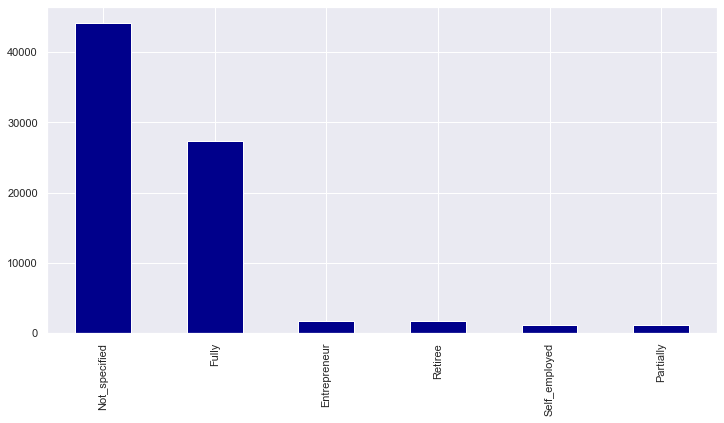

In [44]:
loan['EmploymentStatus'].value_counts().plot.bar(figsize=(12,6),color='darkblue');

In [45]:
loan['OccupationArea'].value_counts()

Not_specified                       44239
Other                                7640
Retail_and_wholesale                 3207
Construction                         3007
Processing                           2876
Transport_and_warehousing            2276
Healthcare_and_social_help           2186
Hospitality_and_catering             2106
Info_and_telecom                     1782
Civil_service_and_military           1555
Education                            1251
Finance_and_insurance                1054
Agriculture_forestry_and_fishing      893
Administrative                        798
Energy                                530
Art_and_entertainment                 524
Research                              493
Real_estate                           433
Utilities                             342
Mining                                116
Name: OccupationArea, dtype: int64

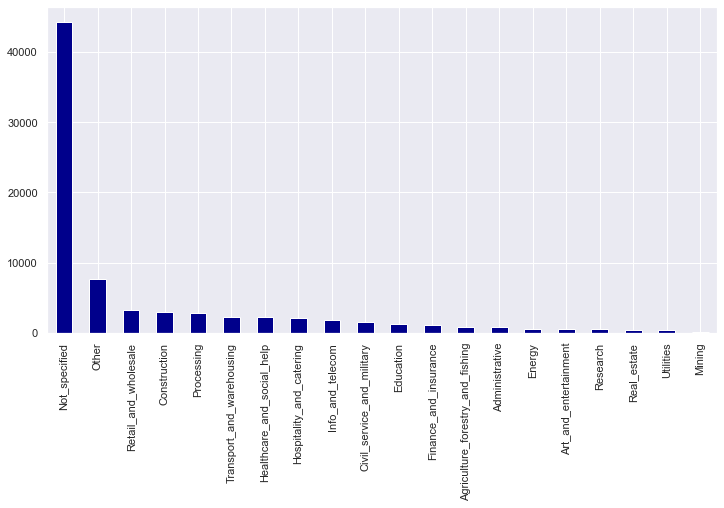

In [46]:
loan['OccupationArea'].value_counts().plot.bar(figsize=(12,6),color='darkblue');

In [47]:
loan['Restructured'].value_counts()

No     61885
Yes    15509
Name: Restructured, dtype: int64

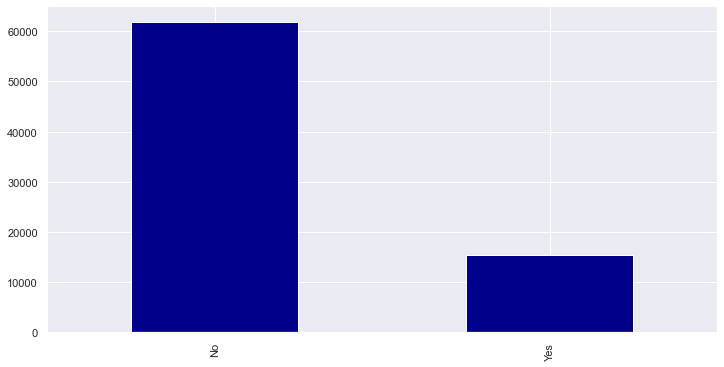

In [48]:
loan['Restructured'].value_counts().plot.bar(figsize=(12,6),color='darkblue');

In [49]:
loan['NewCreditCustomer'].value_counts()

New_credit_Customer         48867
Existing_credit_customer    28527
Name: NewCreditCustomer, dtype: int64

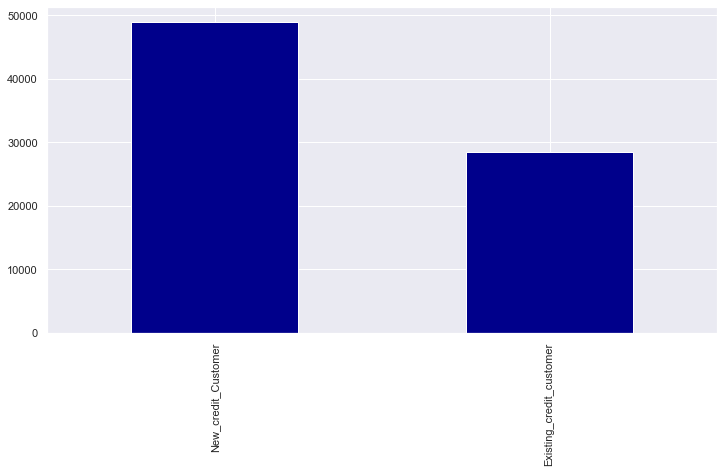

In [50]:
loan['NewCreditCustomer'].value_counts().plot.bar(figsize=(12,6),color='darkblue');

In [51]:
loan['HomeOwnershipType'].value_counts()

 1.0     24594
 3.0     16842
 2.0     12776
 8.0      8762
 4.0      4031
 10.0     3179
 7.0      2701
 6.0      1362
 5.0       882
 9.0       565
 0.0        46
-1.0         2
Name: HomeOwnershipType, dtype: int64

In [52]:

loan['HomeOwnershipType'][loan['HomeOwnershipType'] == -1.0] = 'Not_specified'
loan['HomeOwnershipType'][loan['HomeOwnershipType'] == 0.0] = 'Homeless'
loan['HomeOwnershipType'][loan['HomeOwnershipType'] == 1.0] = 'Owner'
loan['HomeOwnershipType'][loan['HomeOwnershipType'] == 2.0] = 'Living_with_parents'
loan['HomeOwnershipType'][loan['HomeOwnershipType'] == 3.0] = 'Tenant_pre_furnished_property'
loan['HomeOwnershipType'][loan['HomeOwnershipType'] == 4.0] = 'Tenant_unfurnished_property'
loan['HomeOwnershipType'][loan['HomeOwnershipType'] == 5.0] = 'Council_house'
loan['HomeOwnershipType'][loan['HomeOwnershipType'] == 6.0] = 'Joint_tenant'
loan['HomeOwnershipType'][loan['HomeOwnershipType'] == 7.0] = 'Joint_ownership'
loan['HomeOwnershipType'][loan['HomeOwnershipType'] == 8.0] = 'Mortgage'
loan['HomeOwnershipType'][loan['HomeOwnershipType'] == 9.0] = 'Owner_with_encumbrance'
loan['HomeOwnershipType'][loan['HomeOwnershipType'] == 10.0] = 'Other'

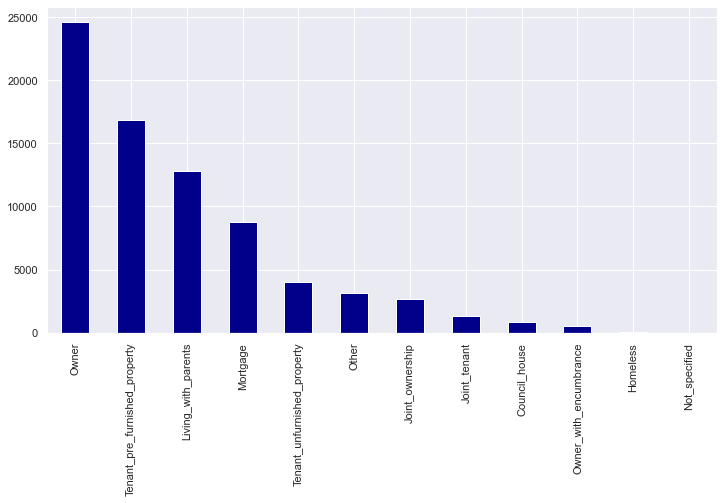

In [53]:
loan['HomeOwnershipType'].value_counts().plot.bar(figsize=(12,6),color='darkblue');

In [54]:
loan['VerificationType']=loan['VerificationType'].map({0.0:'Not_set',1.0:'Income_unverified',2.0:'Income_unverified_crossref_phone',3.0:'Income_verified',4.0:'Income_expenses_verified'})

In [55]:
loan['VerificationType'].value_counts()

Income_expenses_verified            41428
Income_unverified                   25626
Income_verified                      8460
Income_unverified_crossref_phone     1827
Not_set                                 8
Name: VerificationType, dtype: int64

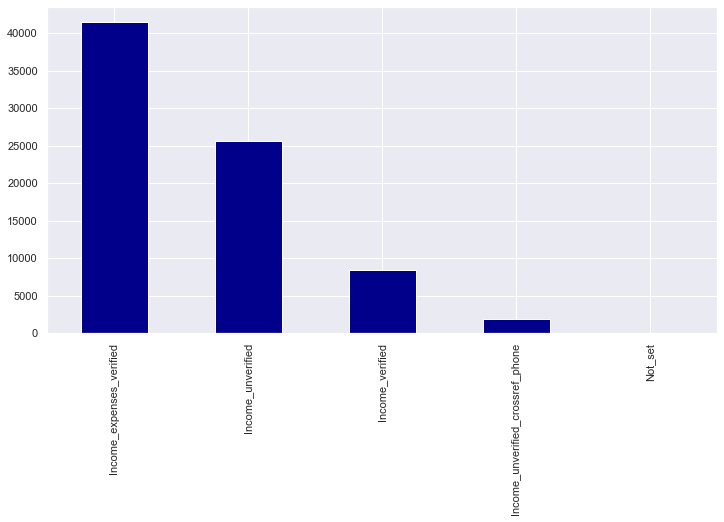

In [56]:
loan['VerificationType'].value_counts().plot.bar(figsize=(12,6),color='darkblue');

In [57]:
loan.to_csv('Bondora_preprocessed.csv',index=False)

In [58]:
df=pd.read_csv('Bondora_preprocessed.csv')

In [59]:
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,LastPaymentOn,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Default
0,0,0,115.0410,New_credit_Customer,2009-06-16,2009-07-27,2010-06-25,2010-06-25,Income_unverified_crossref_phone,Estonian,61,Female,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,Other,Vocational,Married,Fully,UpTo3Years,Retail_and_wholesale,NaN,10500.0,0,0.0,0,0.0,0.0,25,2010-07-06,NaN,No,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,0
1,0,0,140.6057,Existing_credit_customer,2009-06-15,2009-07-15,2009-07-15,2009-07-15,Income_unverified_crossref_phone,Estonian,48,Female,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,Other,Higher,Divorced,Fully,MoreThan5Years,Education,NaN,10800.0,0,0.0,0,0.0,0.0,15,2009-07-07,NaN,No,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,0
2,0,0,319.5580,New_credit_Customer,2009-06-15,2009-07-27,2011-02-25,2014-05-13,Income_unverified_crossref_phone,Estonian,58,Female,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,Home_improvement,Secondary,Married,Fully,UpTo4Years,Hospitality_and_catering,NaN,7000.0,0,0.0,0,0.0,0.0,25,2012-10-01,NaN,Yes,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,1
3,0,0,57.5205,New_credit_Customer,2009-06-15,2009-07-15,2010-09-15,2010-09-15,Income_unverified_crossref_phone,Estonian,23,Female,EE,127.8233,57.5205,45.0,15,NaN,HARJU,PALDISKI,Loan_consolidation,Basic,Single,NaN,UpTo2Years,Other,NaN,11600.0,0,0.0,0,0.0,0.0,15,2010-09-15,NaN,No,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,0
4,0,0,319.5582,New_credit_Customer,2009-06-14,2009-07-27,2010-06-25,2010-06-25,Income_unverified_crossref_phone,Estonian,25,Female,EE,319.5582,319.5436,30.0,12,NaN,TARTU,TARTU,Vehicle,Secondary,Cohabitant,Fully,UpTo2Years,Retail_and_wholesale,NaN,6800.0,0,0.0,0,0.0,0.0,25,2015-07-16,NaN,No,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,0
